#EDA and Feature Importance Analysis

EXPLORATORY DATA ANALYSIS

1. Dataset Overview:
Shape: (602, 2)
Date Range: 1973-01-01 00:00:00 to 2023-02-01 00:00:00

Basic Statistics:
count     602.000000
mean      596.250086
std       196.280571
min       304.328000
25%       467.703500
50%       527.964000
75%       688.787000
max      1223.446000
Name: Renewable_Energy_Production, dtype: float64

Missing Values: 0


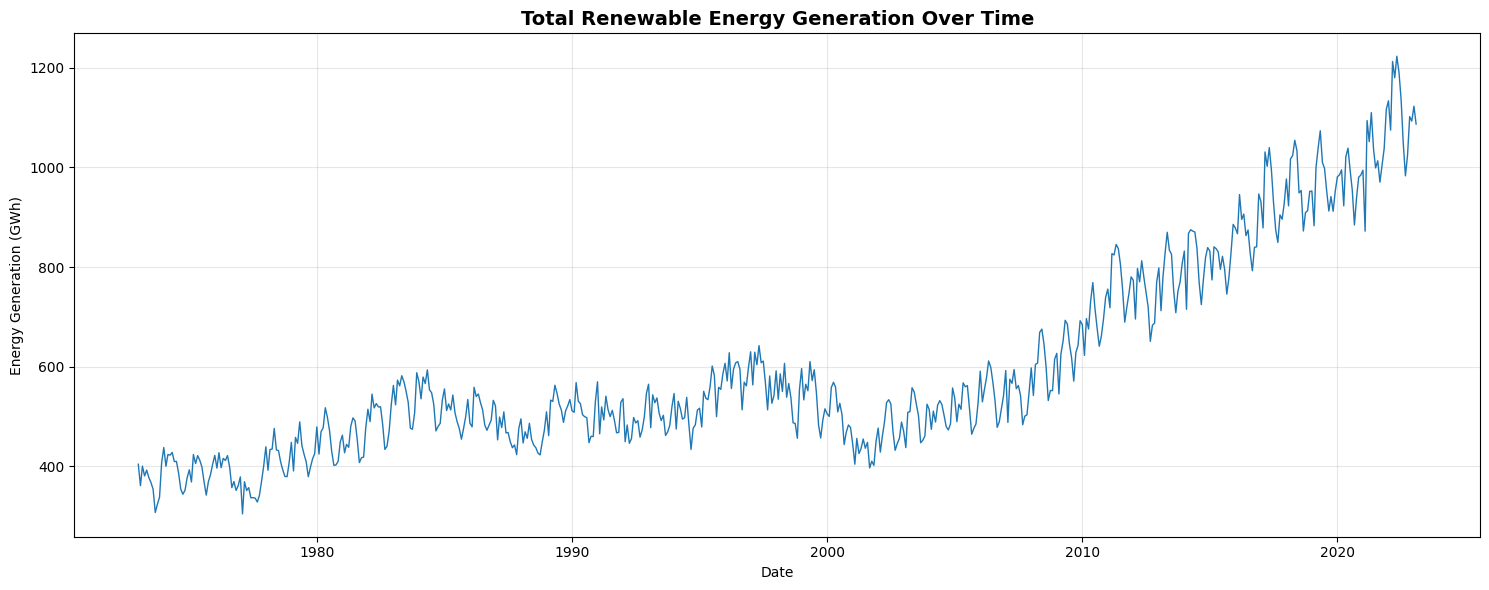

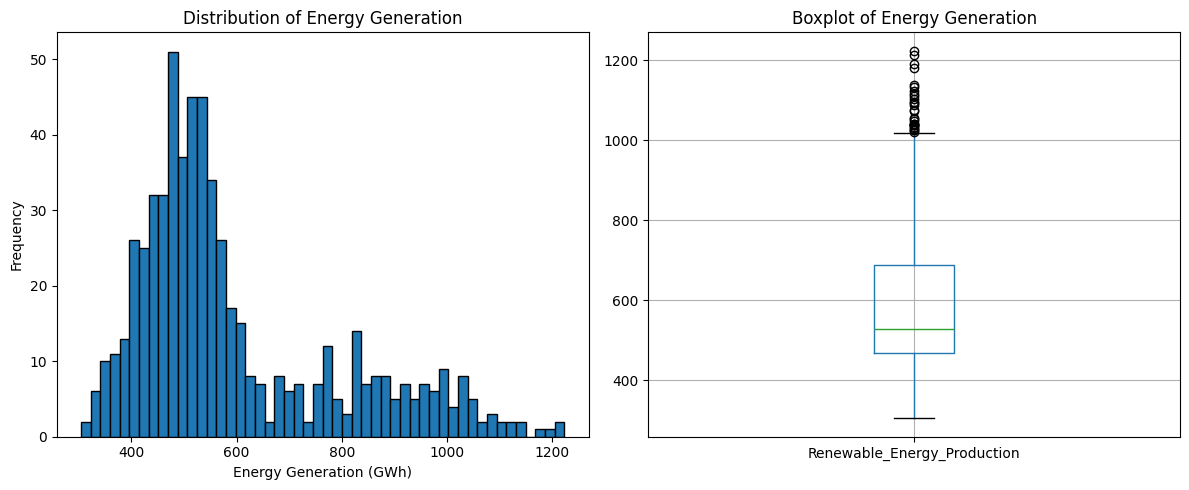


2. Feature Engineering:
Features created: 19 columns
Samples after feature engineering: 512

MODEL COMPARISON AND FEATURE IMPORTANCE

3. Training Linear Regression...
   RMSE: 48.85
   MAE: 39.01
   R²: 0.7936

3. Training Random Forest...
   RMSE: 166.76
   MAE: 140.95
   R²: -1.4052

3. Training Gradient Boosting...
   RMSE: 170.88
   MAE: 148.96
   R²: -1.5256

4. Model Comparison:
                            MSE        RMSE         MAE        R2
Linear Regression   2386.286721   48.849634   39.011386  0.793611
Random Forest      27809.607377  166.762128  140.952688 -1.405238
Gradient Boosting  29200.718711  170.882178  148.956938 -1.525555


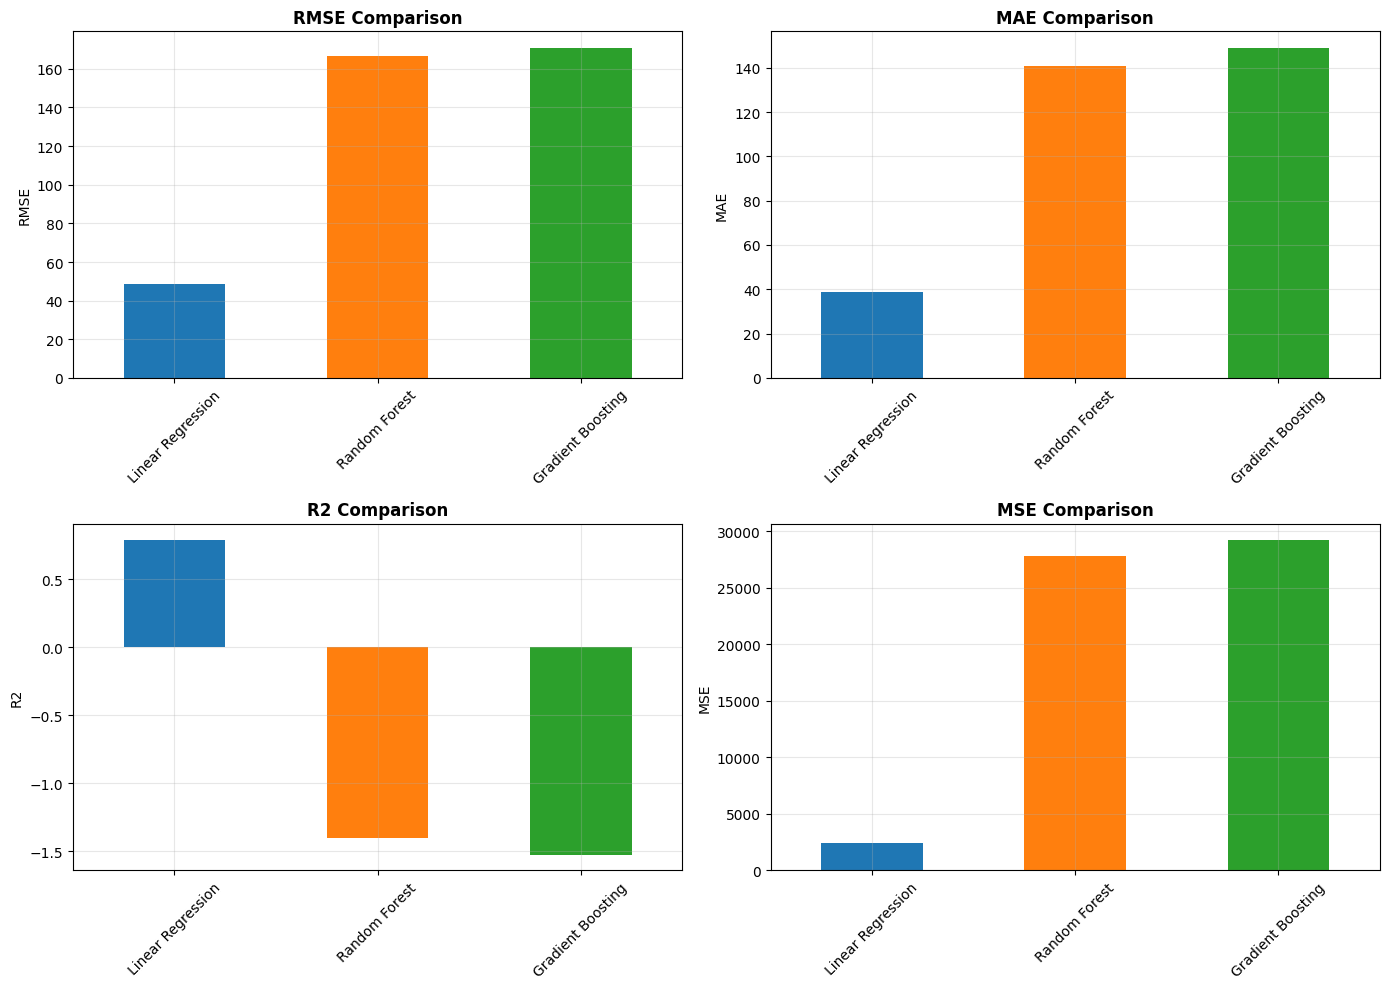


5. Feature Importance Analysis:


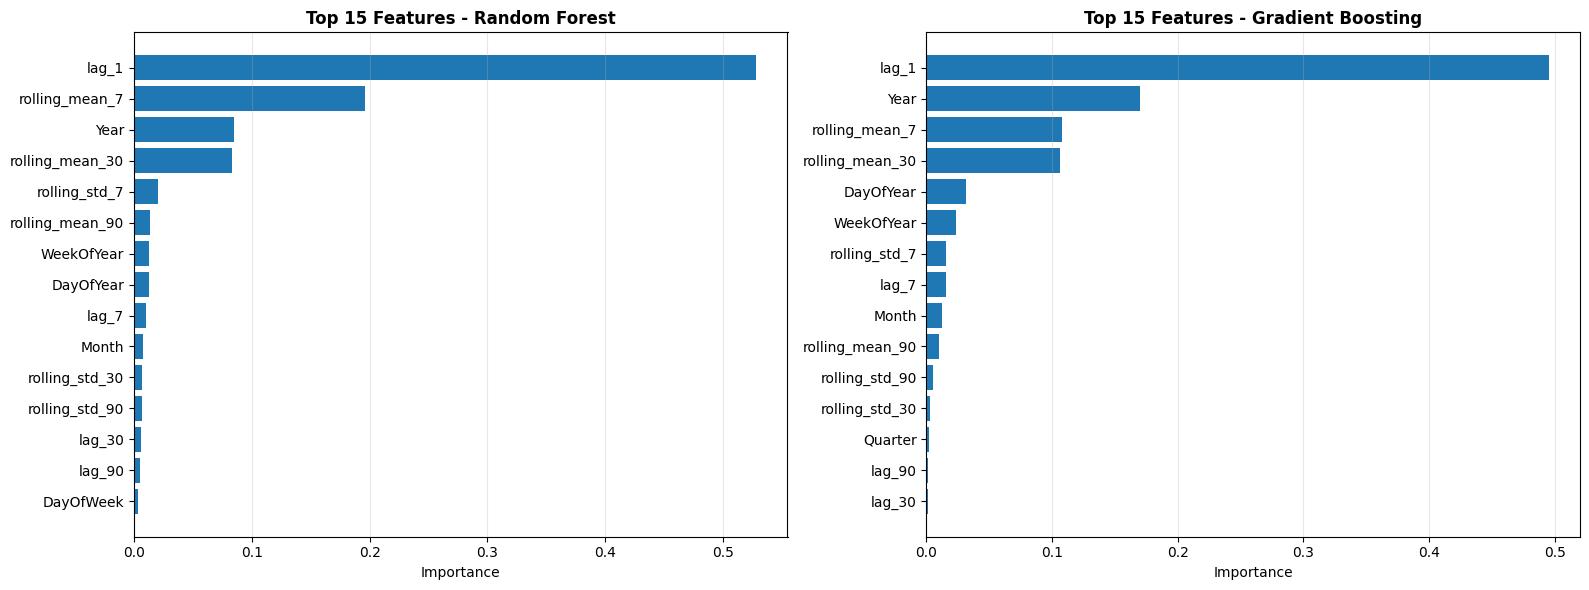


Top 10 Features - Random Forest:
        feature  importance
          lag_1    0.528223
 rolling_mean_7    0.195957
           Year    0.084956
rolling_mean_30    0.083471
  rolling_std_7    0.020130
rolling_mean_90    0.013816
     WeekOfYear    0.012895
      DayOfYear    0.012789
          lag_7    0.010595
          Month    0.007442

Top 10 Features - Gradient Boosting:
        feature  importance
          lag_1    0.495249
           Year    0.170286
 rolling_mean_7    0.107460
rolling_mean_30    0.106448
      DayOfYear    0.031823
     WeekOfYear    0.023398
  rolling_std_7    0.015306
          lag_7    0.015239
          Month    0.012164
rolling_mean_90    0.010002

Best Model: Linear Regression (R² = 0.7936)


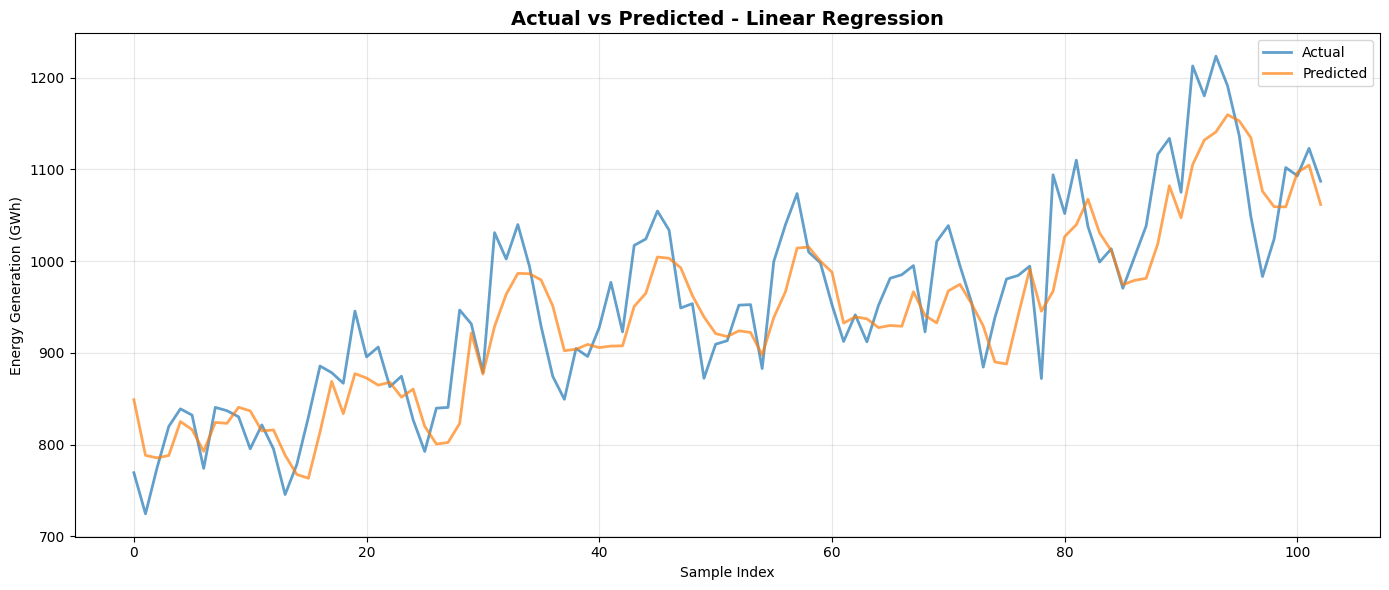


EDA and Feature Importance Analysis Complete!
Saved plots: timeseries_plot.png, distribution_plot.png, model_comparison.png, feature_importance.png, prediction_vs_actual.png


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv('/content/Renewable_Energy_Production.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

print("EXPLORATORY DATA ANALYSIS")

# Basic statistics
print("\n1. Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Date Range: {df['Date'].min()} to {df['Date'].max()}")
print(f"\nBasic Statistics:")
print(df['Renewable_Energy_Production'].describe())

# Missing values
print(f"\nMissing Values: {df.isnull().sum().sum()}")

# Time series plot
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Renewable_Energy_Production'], linewidth=1)
plt.title('Total Renewable Energy Generation Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Energy Generation (GWh)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('timeseries_plot.png', dpi=300)
plt.show()

# Distribution plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Renewable_Energy_Production'], bins=50, edgecolor='black')
plt.title('Distribution of Energy Generation')
plt.xlabel('Energy Generation (GWh)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df.boxplot(column='Renewable_Energy_Production')
plt.title('Boxplot of Energy Generation')
plt.tight_layout()
plt.savefig('distribution_plot.png', dpi=300)
plt.show()

# Feature Engineering
print("\n2. Feature Engineering:")
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Quarter'] = df['Date'].dt.quarter
df['DayOfYear'] = df['Date'].dt.dayofyear
df['WeekOfYear'] = df['Date'].dt.isocalendar().week

# Lag features
for lag in [1, 7, 30, 90]:
    df[f'lag_{lag}'] = df['Renewable_Energy_Production'].shift(lag)

# Rolling statistics
for window in [7, 30, 90]:
    df[f'rolling_mean_{window}'] = df['Renewable_Energy_Production'].rolling(window=window).mean()
    df[f'rolling_std_{window}'] = df['Renewable_Energy_Production'].rolling(window=window).std()

# Drop NaN values created by feature engineering
df = df.dropna()

print(f"Features created: {df.shape[1]} columns")
print(f"Samples after feature engineering: {df.shape[0]}")

# Prepare data for modeling
feature_cols = [col for col in df.columns if col not in ['Date', 'Renewable_Energy_Production']]
X = df[feature_cols]
y = df['Renewable_Energy_Production']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n" + "="*60)
print("MODEL COMPARISON AND FEATURE IMPORTANCE")
print("="*60)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}
feature_importance_dict = {}

# Train and evaluate models
for name, model in models.items():
    print(f"\n3. Training {name}...")

    # Use scaled data for Linear Regression, original for tree-based
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

    print(f"   RMSE: {rmse:.2f}")
    print(f"   MAE: {mae:.2f}")
    print(f"   R²: {r2:.4f}")

    # Feature importance
    if hasattr(model, 'feature_importances_'):
        feature_importance_dict[name] = pd.DataFrame({
            'feature': feature_cols,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)

# Compare models
print("\n4. Model Comparison:")
comparison_df = pd.DataFrame(results).T
print(comparison_df)

# Plot model comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['RMSE', 'MAE', 'R2', 'MSE']
for idx, metric in enumerate(metrics):
    ax = axes[idx//2, idx%2]
    comparison_df[metric].plot(kind='bar', ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    ax.set_title(f'{metric} Comparison', fontweight='bold')
    ax.set_ylabel(metric)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300)
plt.show()

# Plot feature importance
print("\n5. Feature Importance Analysis:")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
for idx, (name, importance_df) in enumerate(feature_importance_dict.items()):
    top_features = importance_df.head(15)
    axes[idx].barh(range(len(top_features)), top_features['importance'])
    axes[idx].set_yticks(range(len(top_features)))
    axes[idx].set_yticklabels(top_features['feature'])
    axes[idx].set_xlabel('Importance')
    axes[idx].set_title(f'Top 15 Features - {name}', fontweight='bold')
    axes[idx].invert_yaxis()
    axes[idx].grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300)
plt.show()

# Print top features
for name, importance_df in feature_importance_dict.items():
    print(f"\nTop 10 Features - {name}:")
    print(importance_df.head(10).to_string(index=False))

# Best model
best_model = comparison_df['R2'].idxmax()
print(f"\n{'='*60}")
print(f"Best Model: {best_model} (R² = {comparison_df.loc[best_model, 'R2']:.4f})")
print(f"{'='*60}")

# Prediction vs Actual plot for best model
if best_model == 'Linear Regression':
    best_pred = models[best_model].predict(X_test_scaled)
else:
    best_pred = models[best_model].predict(X_test)

plt.figure(figsize=(14, 6))
plt.plot(range(len(y_test)), y_test.values, label='Actual', alpha=0.7, linewidth=2)
plt.plot(range(len(y_test)), best_pred, label='Predicted', alpha=0.7, linewidth=2)
plt.title(f'Actual vs Predicted - {best_model}', fontsize=14, fontweight='bold')
plt.xlabel('Sample Index')
plt.ylabel('Energy Generation (GWh)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('prediction_vs_actual.png', dpi=300)
plt.show()

print("\nEDA and Feature Importance Analysis Complete!")
print("Saved plots: timeseries_plot.png, distribution_plot.png, model_comparison.png, feature_importance.png, prediction_vs_actual.png")

#Train and save model

In [2]:
import pandas as pd
import numpy as np
import pickle
import joblib
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("="*60)
print("TRAINING AND SAVING FINAL MODEL")
print("="*60)

# Load data
df = pd.read_csv('/content/Renewable_Energy_Production.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Feature Engineering (same as EDA)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Quarter'] = df['Date'].dt.quarter
df['DayOfYear'] = df['Date'].dt.dayofyear
df['WeekOfYear'] = df['Date'].dt.isocalendar().week

# Lag features
for lag in [1, 7, 30, 90]:
    df[f'lag_{lag}'] = df['Renewable_Energy_Production'].shift(lag)

# Rolling statistics
for window in [7, 30, 90]:
    df[f'rolling_mean_{window}'] = df['Renewable_Energy_Production'].rolling(window=window).mean()
    df[f'rolling_std_{window}'] = df['Renewable_Energy_Production'].rolling(window=window).std()

# Drop NaN values
df = df.dropna()

print(f"\n1. Data Prepared:")
print(f"   Total samples: {df.shape[0]}")
print(f"   Date range: {df['Date'].min()} to {df['Date'].max()}")

# Prepare features
feature_cols = [col for col in df.columns if col not in ['Date', 'Renewable_Energy_Production']]
X = df[feature_cols]
y = df['Renewable_Energy_Production']

# Use 80% for training, 20% for testing
split_idx = int(len(df) * 0.8)
X_train = X.iloc[:split_idx]
X_test = X.iloc[split_idx:]
y_train = y.iloc[:split_idx]
y_test = y.iloc[split_idx:]
dates_test = df['Date'].iloc[split_idx:].values

print(f"   Training samples: {len(X_train)}")
print(f"   Testing samples: {len(X_test)}")

print("\n2. Training Gradient Boosting Model...")
model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    verbose=0
)

model.fit(X_train, y_train)
print("   Model training complete!")

# Evaluate model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print("\n3. Model Performance:")
print(f"   Training RMSE: {train_rmse:.2f}")
print(f"   Training MAE: {train_mae:.2f}")
print(f"   Training R²: {train_r2:.4f}")
print(f"\n   Testing RMSE: {test_rmse:.2f}")
print(f"   Testing MAE: {test_mae:.2f}")
print(f"   Testing R²: {test_r2:.4f}")

# Save model
print("\n4. Saving Model and Components...")
joblib.dump(model, 'energy_model.pkl')
print("   ✓ Model saved: energy_model.pkl")

# Save feature columns
with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(feature_cols, f)
print("   ✓ Feature columns saved: feature_columns.pkl")

# Save training data statistics for feature engineering during prediction
training_stats = {
    'last_values': df[['Renewable_Energy_Production']].tail(90).values.flatten().tolist(),
    'last_date': df['Date'].max(),
    'mean': y.mean(),
    'std': y.std()
}
with open('training_stats.pkl', 'wb') as f:
    pickle.dump(training_stats, f)
print("   ✓ Training statistics saved: training_stats.pkl")



TRAINING AND SAVING FINAL MODEL

1. Data Prepared:
   Total samples: 512
   Date range: 1980-07-01 00:00:00 to 2023-02-01 00:00:00
   Training samples: 409
   Testing samples: 103

2. Training Gradient Boosting Model...
   Model training complete!

3. Model Performance:
   Training RMSE: 0.98
   Training MAE: 0.74
   Training R²: 0.9999

   Testing RMSE: 171.33
   Testing MAE: 146.22
   Testing R²: -1.5389

4. Saving Model and Components...
   ✓ Model saved: energy_model.pkl
   ✓ Feature columns saved: feature_columns.pkl
   ✓ Training statistics saved: training_stats.pkl
